In [57]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import textdistance

import matplotlib.pyplot as plt

In [2]:
def string_to_ngrams(s, n=5):
    """Convert a string to a list of n-grams."""
    return [s[i:i+n] for i in range(len(s) - n + 1)]

def best_match(target, candidates, n=5):
    """
    Find the best match for a target string in a list of candidate strings using n-gram similarity.
    :param target: The string to match.
    :param candidates: List of candidate strings.
    :param n: Length of n-gram.
    :return: Best matching string from candidates.
    """
    target_ngrams = set(string_to_ngrams(target, n))
    
    # Compute Jaccard similarities using n-grams for each candidate
    similarities = [textdistance.jaccard.similarity(target_ngrams, set(string_to_ngrams(candidate, n))) 
                    for candidate in candidates]
    
    # Find the index of the highest similarity
    best_match_index = similarities.index(max(similarities))
    
    # Return the best match
    return candidates[best_match_index]

In [3]:
data = pd.read_csv('data/ge_results.csv')
data = data.sort_values('election')
data.tail()

,constituency_id,seats,constituency_name,country/region,electorate,con_votes,con_share,lib_votes,lib_share,lab_votes,lab_share,natSW_votes,natSW_share,oth_votes,oth_share,total_votes,turnout,election,boundary_set,Unnamed: 19
16190,E14000851,1,North Swindon,South West,82441.0,32584.0,0.591,4408.0,0.080,16413.0,0.298,NaN,NaN,1710.0,0.031,55115.0,0.669,2019,2010-2019,NaN
16189,E14000850,1,North Somerset,South West,80194.0,32801.0,0.529,11051.0,0.178,15265.0,0.246,NaN,NaN,2938.0,0.047,62055.0,0.774,2019,2010-2019,NaN
16188,E14000849,1,North Shropshire,West Midlands,83258.0,35444.0,0.627,5643.0,0.100,12495.0,0.221,NaN,NaN,2931.0,0.052,56513.0,0.679,2019,2010-2019,NaN
16076,E14000761,1,Ipswich,Eastern,75525.0,24952.0,0.503,2439.0,0.049,19473.0,0.393,NaN,NaN,2715.0,0.055,49579.0,0.656,2019,2010-2019,NaN
16075,S14000039,1,Inverness Nairn Badenoch And Strathspey,Scotland,78059.0,15807.0,0.288,5846.0,0.107,4123.0,0.075,26247.0,0.479,2787.0,0.051,54810.0,0.702,2019,2010-2019,NaN


In [5]:
c_list = [data.groupby('constituency_name').count().constituency_id == 10][0].reset_index()
c_list = c_list[c_list.constituency_id]
c_list = c_list.constituency_name.unique()

g_elections = data#[data.constituency_name.isin(c_list)]
g_elections

,constituency_id,seats,constituency_name,country/region,electorate,con_votes,con_share,lib_votes,lib_share,lab_votes,lab_share,natSW_votes,natSW_share,oth_votes,oth_share,total_votes,turnout,election,boundary_set,Unnamed: 19
0,NaN,1,Belfast Victoria,Ireland,19494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13317.0,1.000,13317.0,0.683,1918,1918-1935,NaN
454,189,1,Morpeth,North East,39773.0,4320.0,0.193,7140.0,0.319,7677.0,0.343,NaN,NaN,3240.0,0.145,22377.0,0.563,1918,1918-1935,NaN
455,NaN,1,National University Of Ireland,University,3819.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2457.0,1.000,2457.0,0.643,1918,1918-1935,NaN
456,190,1,Nelson And Colne,North West,43381.0,NaN,NaN,8623.0,0.380,14075.0,0.620,NaN,NaN,NaN,NaN,22698.0,0.523,1918,1918-1935,NaN
457,191,1,Newcastle Under Lyme,West Midlands,29657.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1.000,-1.0,NaN,1918,1918-1935,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16190,E14000851,1,North Swindon,South West,82441.0,32584.0,0.591,4408.0,0.080,16413.0,0.298,NaN,NaN,1710.0,0.031,55115.0,0.669,2019,2010-2019,NaN
16189,E14000850,1,North Somerset,South West,80194.0,32801.0,0.529,11051.0,0.178,15265.0,0.246,NaN,NaN,2938.0,0.047,62055.0,0.774,2019,2010-2019,NaN
16188,E14000849,1,North Shropshire,West Midlands,83258.0,35444.0,0.627,5643.0,0.100,12495.0,0.221,NaN,NaN,2931.0,0.052,56513.0,0.679,2019,2010-2019,NaN
16076,E14000761,1,Ipswich,Eastern,75525.0,24952.0,0.503,2439.0,0.049,19473.0,0.393,NaN,NaN,2715.0,0.055,49579.0,0.656,2019,2010-2019,NaN


In [15]:
by_elections = pd.read_csv('data/by_elections.txt', delimiter='\t')
by_elections_columns = by_elections.columns[0].split(' ')
by_elections.columns = ['tmp']

by_elections['p1'] = by_elections.tmp
by_elections['p2'] = ''


def separate_step_1(delimiter):
    by_elections['p1'] = by_elections.p1.apply(lambda x : x.split(delimiter)[0] if len(x.split(delimiter)) > 1 else x)
    by_elections['p2'] = by_elections.apply(lambda row : row['tmp'].split(delimiter)[1] if len(row['tmp'].split(delimiter)) > 1 else row['p2'], axis=1)


separate_step_1('CON hold')
separate_step_1('Con hold')
separate_step_1('LAB hold')
separate_step_1('Lab hold')
separate_step_1('ILP hold')
separate_step_1('Lib hold')
separate_step_1('PC hold')
separate_step_1('LD hold')
separate_step_1('Ind hold')
separate_step_1('SNP hold')
separate_step_1('Lab gain from CON')
separate_step_1('UKIP gain from CON')
separate_step_1('LD gain from CON')
separate_step_1('LD gain from LAB')
separate_step_1('SDP gain from CON')
separate_step_1('SNP gain from CON')
separate_step_1('SDP gain from LAB')
separate_step_1('Con gain from LAB')
separate_step_1('CON gain')
separate_step_1('LAB gain')
separate_step_1('Lib gain from CON')
separate_step_1('Lib gain from LAB')
separate_step_1('Lib gain from Ind')
separate_step_1('SNP gain from LAB')
separate_step_1('PC gain from LAB')
separate_step_1('Respect gain from LAB')



by_elections['Date'] = by_elections.apply(lambda row: row['p1'] if row['p2'] == '' else row['p1'].split(' ')[0], axis=1)
by_elections['year'] = by_elections['Date'].apply(lambda x: x.split(' ')[2] if x.startswith('GENERAL') else x[-4:])

by_elections['prev_GE'] = by_elections.apply(lambda row: row['year'] if row['p2'] == '' else None, axis=1).fillna(method='ffill')
by_elections['next_GE'] = by_elections.apply(lambda row: row['year'] if row['p2'] == '' else None, axis=1).fillna(method='bfill')

by_elections['constituency_name'] = by_elections.apply(lambda row: '' if row['p2'] == '' else row['p1'][10:], axis=1)

by_elections['p2'] = by_elections.apply(lambda row: [] if row['p2'] == '' else row['p2'].split(' '), axis=1)
by_elections['CON'] = by_elections.apply(lambda row: '' if len(row['p2']) == 0 else row['p2'][1], axis=1)
by_elections['LAB'] = by_elections.apply(lambda row: '' if len(row['p2']) == 0 else row['p2'][2], axis=1)
by_elections['LD'] = by_elections.apply(lambda row: '' if len(row['p2']) == 0 else row['p2'][3], axis=1)
by_elections['PC/SNP'] = by_elections.apply(lambda row: '' if len(row['p2']) == 0 else row['p2'][4], axis=1)
by_elections['Other'] = by_elections.apply(lambda row: '' if len(row['p2']) == 0 else row['p2'][5], axis=1)
by_elections['Turnout'] = by_elections.apply(lambda row: '' if len(row['p2']) == 0 else row['p2'][6], axis=1)

by_elections = by_elections[['Date', 'year','constituency_name','CON','LAB','LD','PC/SNP','Other','Turnout', 'prev_GE', 'next_GE']]
by_elections.to_csv('by_elections.csv', index=False)
by_elections

,Date,year,constituency_name,CON,LAB,LD,PC/SNP,Other,Turnout,prev_GE,next_GE
0,GENERAL ELECTION 1945,1945,,,,,,,,1945,1945
1,01/10/1945,1945,Smethwick,-2.9%,+2.9%,…,…,…,65.4%,1945,1948
2,02/10/1945,1945,Ashton-under-Lyme,-8.6%,-2.3%,+10.9%,…,…,70.5%,1945,1948
3,03/10/1945,1945,Edinburgh E,+1.1%,+5.2%,…,-6.3%,…,51.0%,1945,1948
4,30/10/1945,1945,Monmouth,+0.8%,-0.8%,…,…,…,66.7%,1945,1948
...,...,...,...,...,...,...,...,...,...,...,...
499,15/12/2022,2022,Stretford and Urmston,-11.7%,9.3%,-2.4%,…,4.7%,25.7%,2019,None
500,09/02/2023,2023,West Lancashire,-10.9%,10.2%,-0.8%,…,0.7%,31.3%,2019,None
501,20/07/2023,2023,Uxbridge and South Ruislip,-7.4%,6.0%,1.7%,…,6.1%,46.1%,2019,None
502,20/07/2023,2023,Selby and Ainsty,-26.0%,21.4%,-5.3%,…,9.8%,44.7%,2019,None


In [16]:
# Sample arrays
array2 = g_elections.constituency_name.unique()
array1 = by_elections.constituency_name.unique()

matches = {}

for target in array1:        
    matches[target] = best_match(target, array2)

by_elections['constituency_name'] = by_elections.constituency_name.apply(lambda x: matches[x] if x in matches else '')

In [17]:
matches

{'': 'York',
 ' Smethwick ': 'Smethwick',
 ' Ashton-under-Lyme ': 'Newcastle-Under-Lyme',
 ' Edinburgh E ': 'Edinburgh East',
 ' Monmouth ': 'Monmouth',
 ' City of London1,2 ': 'City Of London',
 ' Bromley ': 'Bromley',
 ' Bournemouth ': 'Bournemouth',
 ' Kensington South ': 'Kensington South',
 ' Tottenham North ': 'Tottenham North',
 ' Preston1 ': 'Preston',
 ' Ayrshire South ': 'Ayrshire South',
 ' Glasgow, Cathcart ': 'Glasgow Cathcart',
 ' Heywood and Radcliffe ': 'Lancashire Heywood And Radcliffe',
 ' Ogmore ': 'Ogmore',
 ' Bexley ': 'Bexley',
 ' Pontypool ': 'Pontypool',
 ' Battersea North ': 'Battersea North',
 ' Glasgow, Bridegton ': 'Glasgow Bridgeton',
 ' Bermondsey, Rotherhithe ': 'Bermondsey Rotherhithe',
 ' Paddington North ': 'Paddington North',
 ' Aberdeen South ': 'Aberdeen South',
 ' Aberdare ': 'Aberdare',
 ' Kilmarnock ': 'Kilmarnock',
 ' Normanton ': 'Normanton',
 ' Jarrow ': 'Jarrow',
 ' Liverpool, Edge Hill ': 'Liverpool Edge Hill',
 ' Islington West ': 'Islingto

Text(0.5, 1.0, 'The Shy Tory Feint')

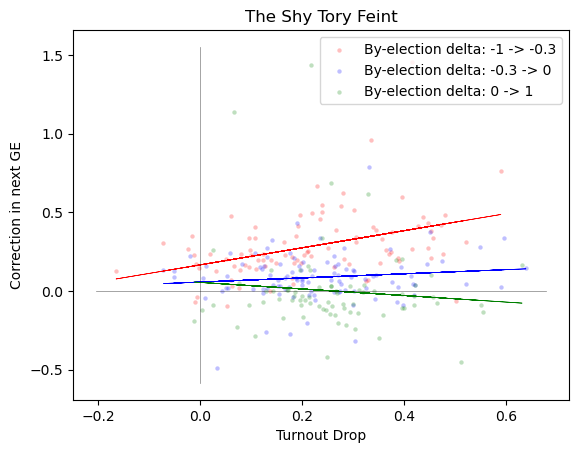

In [81]:
by_elections['election'] = by_elections['prev_GE']
by_elections_m = by_elections.merge(g_elections, on=['election', 'constituency_name'])
by_elections_m['election'] = by_elections_m['next_GE']
by_elections_m = by_elections_m.merge(g_elections, on=['election', 'constituency_name'])


by_elections_m['CON'] = (pd.to_numeric(by_elections_m['CON'].str.rstrip('%'), errors='coerce') / 100.0).fillna(0)
by_elections_m['LAB'] = (pd.to_numeric(by_elections_m['LAB'].str.rstrip('%'), errors='coerce') / 100.0).fillna(0)
by_elections_m['LD'] = (pd.to_numeric(by_elections_m['LD'].str.rstrip('%'), errors='coerce') / 100.0).fillna(0)
by_elections_m['PC/SNP'] = (pd.to_numeric(by_elections_m['PC/SNP'].str.rstrip('%'), errors='coerce') / 100.0).fillna(0)
by_elections_m['Other'] = (pd.to_numeric(by_elections_m['Other'].str.rstrip('%'), errors='coerce') / 100.0).fillna(0)
by_elections_m['Turnout'] = (pd.to_numeric(by_elections_m['Turnout'].str.rstrip('%'), errors='coerce') / 100.0).fillna(0)

by_elections_m['turnout_delta'] = 1 - by_elections_m.Turnout/by_elections_m.turnout_x
by_elections_m['drop_relative'] = by_elections_m.CON/by_elections_m.con_share_x

by_elections_m['change_relative'] = by_elections_m.con_share_y/by_elections_m.con_share_x - 1

by_elections_m['correction_relative'] = by_elections_m['change_relative'] - by_elections_m['drop_relative']

by_elections_m = by_elections_m[by_elections_m.turnout_delta < 0.95]


def plot_segment(i0, i1, c):
    x = by_elections_m[i0 < by_elections_m['drop_relative']][i1 > by_elections_m['drop_relative']]
    if(x.turnout_delta.count() > 0):
        plt.scatter(x.turnout_delta, x.correction_relative, color = c, label='By-election delta: ' + str(i0) + ' -> ' + str(i1), alpha=0.25, s=10, lw=0)

        z = np.polyfit(x.turnout_delta, x.correction_relative, 1)
        p = np.poly1d(z)

        # Plot the trend line
        plt.plot(x.turnout_delta, p(x.turnout_delta), color=c, lw=0.5)
        

plot_segment(-1, -0.3, 'red')
plot_segment(-0.3, 0, 'blue')
plot_segment(0, 1, 'green')

plt.plot(plt.xlim(), [0, 0], color='black', lw=0.5, alpha=0.5)
plt.plot([0, 0], plt.ylim(), color='black', lw=0.5, alpha=0.5)
    
plt.legend()
plt.xlabel('Turnout Drop')
plt.ylabel('Correction in next GE')
plt.title('The Shy Tory Feint')
